<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/pytorch_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loss:  0.1297597438097
Mean Squared Error:  0.1297597438097


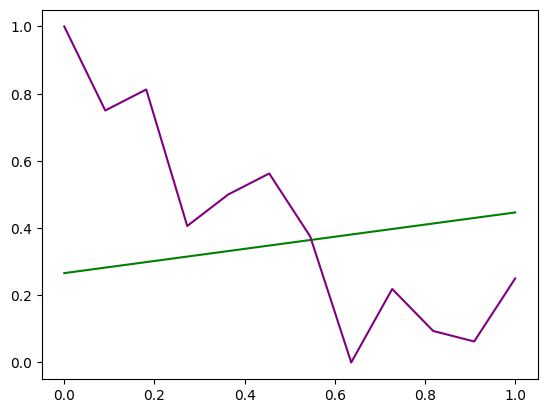

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Data preparation
y = torch.tensor([73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49], dtype=torch.float32)
x = torch.arange(len(y), dtype=torch.float32).reshape(-1, 1)

# Normalize input data
scaler_x = MinMaxScaler()
x = torch.tensor(scaler_x.fit_transform(x), dtype=torch.float32)

scaler_y = MinMaxScaler()
y = torch.tensor(scaler_y.fit_transform(y.reshape(-1, 1)), dtype=torch.float32)

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Make predictions
with torch.no_grad():
    Y_pred = model(x)

# Evaluate the model
loss = criterion(Y_pred, y).item()
print('Loss: ', loss)
print('Mean Squared Error: ', loss)  # In PyTorch, MSE is the same as the loss for nn.MSELoss()

# Plotting
plt.plot(x.numpy(), Y_pred.numpy(), color='green')
plt.plot(x.numpy(), y.numpy(), color='purple')
plt.show()
